<a href="https://colab.research.google.com/github/pietroventurini/machine-learning-notes/blob/master/9%20-%20Cluster%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis

## Content

1. [**Introduction**](#Introduction)  
    1. Types of clusters  
2. [**K-means**](#K-means)  
    1. Convergence of k-means  
    2. How many centroids?  
    3. Pre-processing and Post-processing  
3. [**Hierarchical clustering**](#Hierarchical-clustering)  
    1. The dendrogram  
    2. Agglomerative clustering 
4. [**DBSCAN**](#DBSCAN)
5. [**Cluster validity**](#Cluster-validity)

# Introduction

Differently from supervised learning algorithms, unsupervised learning consists into looking for undetected patterns in a dataset, with no pre-existing labels attached to each entry. Its goal is to infer properties of the probability density governing the population from which the available observations come, without the help of a supervisor/teacher providing a degree of error for each observation.

**Cluster analysis**, or _data segmentation_, is a type of unsupervised learning technique, that aims at grouping collection of objects into **clusters**, such that elements within each cluster are more related (or _similar_, according to a suitable notion of similarity, which is application-dependent) to one another than objects in different clusters.  In other words, it aims at minimizing the intra-cluster distances, while maximizing inter-cluster ones.

A **clustering** is a set of clusters. 

Note that, sometimes, the notion of cluster can be ambiguous, and different assumptions about the total number of clusters yields to different results.

<img src="images/cluster_analysis/n_of_clusters.jpg" alt="Three different assumptions about the number of clusters" style="display:block; margin-left: auto; margin-right: auto; width:70em"/>

We can distinguish between:
- **Partitional clustering**: each object belongs in exactly one cluster. A famous algorithm that belongs to this family is ***k-means***.
- **Hierarchical clustering**: consists in a set of **nested clusters** organized in a tree.

Partitional clustering           |  Hierarchical clustering
:-------------------------:|:-------------------------:
<img src="images/cluster_analysis/partitional.jpg" alt="Partitional clustering" style="width:30em"/>  |  <img src="images/cluster_analysis/hierarchical.jpg" alt="Hierarchical clustering" style="width:30em"/>

Moreover, clustering can be further distinguished into:
- **Exclusive vs Non-exclusive**: in non-exclusive clustering, points can belong simultaneously to multiple clusters.
- **Fuzzy vs Non-fuzzy**: in fuzzy, points belong to clusters with a weight between 0 and 1. Weights must sum to 1.
- **Partial vs Complete**: in partial, we want only a subset of the data to be clustered.
- **Heterogeneous vs Homogeneous**: in heterogeneous, we allow cluster of different sizes, shapes and densities.

## Types of clusters

- **Well-separated**: any point in a cluster is closer (in terms of **similarity measure**) to *every other* point in the same cluster than to any point in other clusters.
- **Center-based**: clusters such that elements they contain are closer to its center (which is often a *centroid* or a *medoid*), than to any of the other clusters' centers.
- **Contiguity-based**: each cluster is a set of points such that every point in that cluster is closer to *one or more* other points in the same cluster than to any other point.
- **Density-based**: a cluster is a dense region of points, separated by low-density regions from other high-density ones. 
- **Conceptual clusters**: aims at finding clusters that share some common property or share a particular concept.
- **Clusters defined by an objective function**: clusters are found such that a certain objective function is optimized. All possible ways to grouping points into clusters are enumerated and the corresponding "goodness" is evaluated (this is a NP-hard problem). Typically, hierarchical clustering algorithms have local objectives while partitional clustering algorithms have globals. In order to make the problem computationally tractable, we can try to fit the data to a parameterized model.

# K-means

K-means clustering is a method of vector quantization that aims to partition $n$ observations into $k$ clusters, where the i-_th_ observation belongs to the cluster with the nearest mean.

- Initialize clusters centroids $\mu_1, \dots, \mu_k \in \mathbb{R}^n$.
- Repeat until convergence:  
    - For every point $x^{(i)}$ set $$c^{(i)} = \arg \underset{j}{\min}{\Vert x^{(i)} - \mu_j \Vert^2}$$  
    - For every $j$ set $$\mu_j = \frac{\sum_{i=1}^{n} 1\{c^{(i)} = j\}x^{(i)}}{\sum_{i=1}^{n} 1\{c^{(i)} = j\}}$$
    
In the algorithm, $k$ is a parameter that represents the number of clusters we want to find. The centroids $\mu_j$ represent our current guess about the position of the clusters' centers. The initialization of the centroids can happen in many ways, for instance, we can randomly choose $k$ points from our training set.

A graphical illustration of how the algorithm operates is shown in the following figure (credits to Stanford University):

<img src="images/cluster_analysis/k_means.jpg" alt="Three different assumptions about the number of clusters" style="display:block; margin-left: auto; margin-right: auto; width:70em"/>

### Convergence of K-means

Define the distortion function

$$J(c, \mu) = \sum_{i=1}^{n} \Vert x^{(i)} - \mu_{c^{(i)}} \Vert^2.$$

$J$ measures the sum of squared distances between each training point $x^{(i)}$ and the cluster centroid $\mu_{c^{(i)}}$ to which it has been assigned. The inner loop of k-means repeatedly minimizes $J$ with respect to $c$ while holding $\mu$ fixed, then minimizes $J$ with respect to $\mu$ while holding $c$ fixed. Thus $J$ monotonically decrease (actually it is possible that k-means keeps oscillating between a few different clusterings that yields the same values of $\mu$ and/or $c$. $J$ is a non-convex function, so, coordinate-descent on $J$ is not guaranteed to converge to a global minimum. Workarounds involve to run k-means multiple times, finally picking the clustering that gives the lowest distortion.

### How many centroids?

As we have seen in the introduction, the results may differ a lot according to the number of centroids we assume. Possible workarounds to this problem are:
- run k-means multiple times, each time with a different number of clusters, finally choosing the one with the lowest distortion,
- generate more than $k$ initial centroids, then select among these initial centroids,
- use hierarchical clustering to determine the initial centroids.

It may happen for k-means to yiled some empty clusters. In those cases, we can assign a point from the cluster with highest dissimilarity measure to the empty cluster. Otherwise, we could choose the point the contributes most to SSE.

### Pre-processing and Post-processing

In the pre-processing phase, we can normalize the data or try to remove outliers.

In the post-processing phase, we can remove small clusters that may represent outliers, split _loose_ clusters (clusters having relatively high SSE), or merge clusters that are close and that have relatively low SSE.

# Hierarchical clustering

Differently from K-means, which requires to choose the number of clusters a-priori and a starting configuration, hirarchical clustering algorithms do not. Instead, we need to specify a **dissimilarity measure** between **disjoint groups of observations**. That measure is based on pairwise dissimilarities between the observations of the two groups. These algorithms, produce a hierarchy of clusters, where clusters of a certain level are created by merging clusters at the next lower level. The root of this structure is a cluster containing all the data, while the leaves are clusters of a single observation.

There are two basic paradigms:
- **Agglomerative**: it starts with the points as individual clusters. Then, it **merges the pair** of clusters at a certain level **having the smallest intergroup dissimilarity**, in order to produce a single, bigger, cluster at the upper level. In agglomerative methods, the dissimilarity between merged clusters is *monotone increasing*.
- **Divisive**: it consists in **splitting** an existing cluster in order to produce two new groups having the **largest between-group dissimilarity**.

Each level of the hierarchy represents a grouping of the data into disjoint sets. We have to choose which is the level that represents a satisfying clustering.

## The dendrogram

We can graphically represent the sequence of groupings (the hierarchy) using a **dendrogram**: a tree where on the abscissa axis it represents the logical distance (according to the defined metric) of the clusters, while the height of each node is proportional to the value of intergroup dissimilarity between its two children. In other words, the higher the link between two clusters is, the more different their features are. The lower in the tree groups of observations fuse together, the more similar their observations are. On the other hand, observations that fuse later, near the root of the tree, can be quite different.

If we cut the dendrogram horizontally at a particular height, we partition the data into disjoint clusters represented by the vertical lines that intersect the cut. Therefore, a single dendrogram can be used to obtain any number of clusters depending on the height we cut it horizontally.

**Note:** we don't typically use the dendrogram by just looking at it to determine the "right" number of clusters.

<img src="images/cluster_analysis/dendrogram.jpg" alt="Dendrogram corresponding to a dataset of 9 elements with 2 features" style="display:block; margin-left: auto; margin-right: auto; width:45em"/>

Note in the image that, even if $2$ and $9$ are relatively close to each other in the dendrogram, they are quite different, since $9$ is not more similar to $2$ than it is to $5, 8$ or $7$. Therefore, we don't make conclusion about two observations' dissimilarity according to their position along the horizontal axis, but we do that along the vertical axis where the two groups containing them are fused.

## Agglomerative clustering

At the beginning every observation constitutes a singleton cluster. At each of the $N-1$ steps, we **merge the two least dissimilar clusters** (the two closest clusters), producing one less cluster at the upper level. Three common dissimilarity measures $d(G,H)$ between two groups $G$ and $H$ are:

#### Single linkage (nearest neighbor)

Takes the least dissimilar pair distance as the intergroup dissimilarity: 

$$d_{SL}(G,H) = \min_{i\in G,\; i' \in H} d_{ii'}$$

This dissimilarity tends to produce clusters with very large diameter $D_G = \max_{i\in G,\; i'\in G}d_{ii'}$, facing the risk of violating the *compactness* property of having observations in a clusters that are all relatively similar to observations in the same cluster.

#### Complete linkage (furthest neighbor)

Takes the most dissimilar pair distance as the intergroup dissimilarity:

$$d_{CL}(G,H) = \max_{i\in G,\; i' \in H} d_{ii'}$$

This dissimilarity tends to produce clusters with low diameter, considering two clusters close only if all of their observations are relatively similar. Consequently, it can violate the *closeness* property, by assigning observations to a cluster even if they are closer to members of other clusters. It is less susceptible to noise and outliers but it tends to break large clusters.

#### Group average

Takes the average dissimilarity between the two groups $G$ and $H$, containing $N_G$ and $N_H$ observations respectively:

$$d_{GA}(G,H) = \frac{1}{N_G N_H} \sum_{i \in G} \sum_{i' \in H} d_{ii'}$$

It tends to produce relatively compact clusters that are relatively far apart.

### Agglomerative clustering algorithm

We can keep track of the distances (either similarities or dissimilarities) between data points using a **proximity matrix**, which is a $N\times N$ matrix $D$, where $N$ is the number of points in the training set and each element $d_{ii'}$ records the proximity between the $i$th and the $i'$th objects. Most algorithms presume a matrix $D$ with non-negative elements and zero diagonal elements: $d_{ii}=0\; i=1,\dots,N$. Also, most algorithms assume a symmetric proximity matrix.

The basic agglomerative clustering algorithm is straightforward:
```python
Compute the proximity matrix D
Let each data point be a cluster 
while (n_of_clusters > 1):
    Merge two clusters according to the dissimilarity measure used  
    Update the proximity matrix 
```

The spatial complexity is $O(N^2)$ because of the proximity matrix. The temporal complexity can be $O(N^3)$ in many cases, since there are $N$ cycles, and at each cycle a $N\times N$ matrix must be updated and searched. Anyway, with some approaches, complexity can be reduced to $O(N^2 \log N)$.

### Example

In this example we are going to perform single linkage agglomerative clustering (using nearest neighbor as proximity measure). Let the proximity matrix $D$ corresponding to the original dataset be:

|    |  p1  |  p2  |  p3  |  p4  |  p5  |  p6  |
|:--:|:----:|:----:|:----:|:----:|:----:|:----:|
| **p1** |   0  | 0.24 | 0.22 | 0.37 | 0.34 | 0.23 |
| **p2** | 0.24 |   0  | 0.15 | 0.20 | 0.14 | 0.25 |
| **p3** | 0.22 | 0.15 |   0  | 0.15 | 0.28 | **0.11** |
| **p4** | 0.37 | 0.20 | 0.15 |   0  | 0.29 | 0.22 |
| **p5** | 0.34 | 0.14 | 0.28 | 0.29 |   0  | 0.39 |
| **p6** | 0.23 | 0.25 | **0.11** | 0.22 | 0.39 |   0  |

The most similar points, according to the nearest neighbor metric, are `p3` and `p6`. So, we merge them into a single cluster, and proceed to recompute the proximity matrix $D$. Note that the only values that we have to compute are those belonging to the new row and to the new column `p3 & p6`:

|         |  p1  |  p2  | p3 & p6 |  p4  |  p5  |
|:-------:|:----:|:----:|:-------:|:----:|:----:|
|    **p1**   |   0  | 0.24 |   0.22  | 0.37 | 0.34 |
|    **p2**   | 0.24 |   0  |   0.15  | 0.20 | **0.14** |
| **p3 & p6** | 0.22 | 0.15 |    0    | 0.15 | 0.28 |
|    **p4**   | 0.37 | 0.20 |   0.15  |   0  | 0.29 |
|    **p5**   | 0.34 | **0.14** |   0.28  | 0.29 |   0  |

Now, the most similar clusters are `p2` and `p5`. Let's re-compute the proximity matrix:

|         |  p1  | p2 & p5 | p3 & p6 |  p4  |
|:-------:|:----:|:-------:|:-------:|:----:|
|    **p1**   |   0  |   0.24  |   0.22  | 0.37 |
| **p2 & p5** | 0.24 |    0    |   0.15  | 0.20 |
| **p3 & p6** | 0.22 |   0.15  |    0    | 0.15 |
|    **p4**   | 0.37 |   0.20  |   0.15  |   0  |

At this point, we could merge `p4` with either `p2 & p5` or `p3 & p6`, and keep going on building the dendrogram, until we are left with a single cluster. The result is the following:

<img src="images/cluster_analysis/agglomerative_min.png" alt="Result of applying single linkage agglomerative clustering on an example" style="display:block; margin-left: auto; margin-right: auto; width:36em"/>

If we instead would have opted for **complete linkage** agglomerative clustering (furthest neighbor), we would have ended up with:

<img src="images/cluster_analysis/agglomerative_max.png" alt="Result of applying complete linkage agglomerative clustering on an example" style="display:block; margin-left: auto; margin-right: auto; width:36em"/>

If, otherwise, we would have opted for **group average** agglomerative clustering, the result would have been:

<img src="images/cluster_analysis/agglomerative_group.png" alt="Result of applying group average agglomerative clustering on an example" style="display:block; margin-left: auto; margin-right: auto; width:36em"/>

# DBSCAN

DBSCAN is a clustering algorithm that, differently from k-means, defines cluster as continuous regions of high density. With density we mean the number of points within a specified radius $\varepsilon$. 

**Definition (Core point)**: A point is called **core point** if it has more than a specified number of points (`min_samples`) within $\varepsilon$. These are the points at the interior of a cluster.

**Definition (Border point)**: A point is called **border point** if it has less then `min_samples` within $\varepsilon$, but is in the neighborhood of a core point.

**Definition (Noise point)**: Any point that is neither a core point nor a border point.

### The algorithm

- for each instance count how many other instances fall within its neighbor of radius $\varepsilon$. This region is the instance's $\varepsilon$-neighborhood. 
    - if the instance has `min_samples` in its $\varepsilon$-neighborhood, then label it as a core instance.  
    - if the instanece has less then `min_samples` in its $\varepsilon$-neighborhood, but still fall in a $\varepsilon$-neighborhood of a core instance, then label it as a border instance.
    - otherwise remove it because it is a noise point.
- put an edge between all core points that are within $\varepsilon$ of each oter.
- make each group of connected points into a separate cluster
- assign each border point to one of the clusters of its associated core points.

<img src="images/cluster_analysis/dbscan.jpg" alt="Result of applying dbscan algorithm" style="display:block; margin-left: auto; margin-right: auto; width:50em"/>

**Pros:**
- Robust to noise
- Can handle clusters of different shape and size

**Cons:**
- It does not work well when the points are grouped in clusters with varying densities
- It does not work well with high-dimensional data

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
    
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# labels of all instances are in the labels_ instance variable
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

Labels with index `-1` correspond to noise points

In [25]:
# indices of core instances are in the core_sample_indices_ instance variable
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [26]:
# core instances are in the components_ instance variable
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

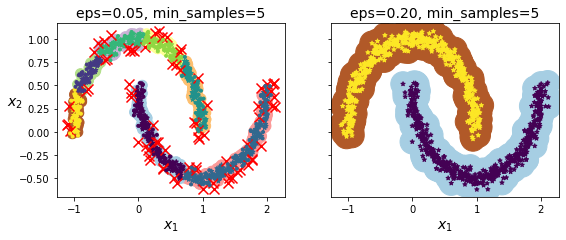

In [30]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    """ 
    Plots the results of the dbscan algorithm 
    
    """
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
    
    
# fit dbscan2 with a larger eps value and plot dbscan results
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Notice how, with a small value of $\varepsilon$, we obtained a bad result consisting of seven different clusters, with many noise points. By enlarging $\varepsilon$ we got the clustering in the right plot, which looks correct.

# Cluster validity

In supervised learning we can use many measures to evaluate how good a model is. We would like to do the same also in clustering, in order to evaluate the goodness of the resulting clustering. Since clusters are "in the eye of the beholder", why do we want to evaluate them? The reasons may be to avoid finding patterns in the noise, to compare clustering algorithm or to compare clusterings.

Numerical measures that are applied to judge various aspects of cluster validity, are classified into the following three types:
- **External Index:** Used to measure the extent to which cluster labels match externally supplied class labels.  
    - Entropy  
- **Internal Index:** Used to measure the goodness of a clustering structure without respect to external information.  
    - Sum of Squared Error (SSE)
- **Relative Index:** Used to compare two different clusterings or clusters. Often an external or internal index is used for this function, e.g. SSE or entropy  